<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/Oximetry_Data_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/Oximetry_Data.csv'

In [4]:
df = pd.read_csv(FILE_LOCATION)
df
#df.head()

,no,obs,rep,CO,PULSE,obs_new,CO_new,PULSE_new,CO_1,PULSE_1,CO_2,PULSE_2,CO_3,PULSE_3
0,1,1,1,0.5497,0.3889,1.0,0.5299,0.4104,0.5497,0.3889,0.5102,0.4102,0.5297,0.4320
1,2,1,2,0.5102,0.4102,2.0,0.3314,0.3208,0.3414,0.3274,0.3194,0.3076,0.3334,0.3274
2,3,1,3,0.5297,0.4320,3.0,0.6372,0.5694,0.6856,0.6585,0.6048,0.5248,0.6213,0.5248
3,4,2,1,0.3414,0.3274,4.0,0.2732,0.2500,0.2181,-0.1224,0.2842,0.3475,0.3174,0.5248
4,5,2,2,0.3194,0.3076,5.0,0.4837,0.4127,0.4959,0.5006,0.4475,0.4102,0.5078,0.3274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,179,60,2,0.7042,0.5248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,180,60,3,0.7432,0.6021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,181,61,1,0.4982,0.4102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,182,61,2,0.5174,0.3680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
table = df[['obs_new', 'CO_new', 'PULSE_new']]
table

,obs_new,CO_new,PULSE_new
0,1.0,0.5299,0.4104
1,2.0,0.3314,0.3208
2,3.0,0.6372,0.5694
3,4.0,0.2732,0.2500
4,5.0,0.4837,0.4127
...,...,...,...
178,NaN,NaN,NaN
179,NaN,NaN,NaN
180,NaN,NaN,NaN
181,NaN,NaN,NaN


In [6]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['obs_new', 'CO_new', 'PULSE_new'])
table1

,obs_new,CO_new,PULSE_new
0,1.0,0.5299,0.4104
1,2.0,0.3314,0.3208
2,3.0,0.6372,0.5694
3,4.0,0.2732,0.2500
4,5.0,0.4837,0.4127
...,...,...,...
56,57.0,0.9380,0.8911
57,58.0,0.9494,0.8179
58,59.0,0.9647,1.0359
59,60.0,0.7602,0.5674


In [7]:
table1.mean()

obs_new      31.000000
CO_new        0.533466
PULSE_new     0.465969
dtype: float64

In [8]:
x = table1[['PULSE_new']]
y = table1['CO_new']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

table_data_new = pd.DataFrame({ 'x1'    : table1['PULSE_new'],
                                'y'     : table1['CO_new'],
                                'y_hat' : df['Predicted']})
table_data_new['e'] = table_data_new['y'] - table_data_new['y_hat']
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,y,y_hat,e
0,0.4104,0.5299,0.476748,0.053152
1,0.3208,0.3314,0.385295,-0.053895
2,0.5694,0.6372,0.639035,-0.001835
3,0.2500,0.2732,0.313031,-0.039831
4,0.4127,0.4837,0.479095,0.004605
...,...,...,...,...
56,0.8911,0.9380,0.967387,-0.029387
57,0.8179,0.9494,0.892673,0.056727
58,1.0359,0.9647,1.115180,-0.150480
59,0.5674,0.7602,0.636994,0.123206


In [9]:
table_data_new.to_csv('Oximetry_Data.csv')
files.download('Oximetry_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

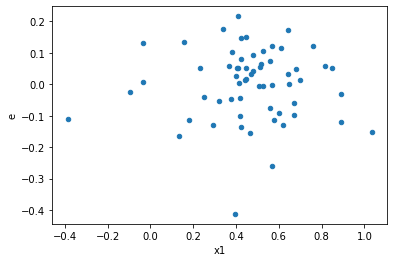

In [10]:
table_data_new.plot(x ='x1', y='e', kind = 'scatter')

In [11]:
# เรียง data จากน้อยไปมากตาม y_hat
new_table_sort = table_data_new.sort_values('y_hat')
new_table_sort.reset_index(inplace=True)
new_table_sort.drop(['index'], axis=1, inplace=True)
new_table_sort

,x1,y,y_hat,e
0,-0.3869,-0.4483,-0.337037,-0.111263
1,-0.0952,-0.0645,-0.039306,-0.025194
2,-0.0349,0.1522,0.022241,0.129959
3,-0.0349,0.0296,0.022241,0.007359
4,0.1343,0.0301,0.194939,-0.164839
...,...,...,...,...
56,0.8179,0.9494,0.892673,0.056727
57,0.8482,0.9740,0.923600,0.050400
58,0.8911,0.9380,0.967387,-0.029387
59,0.8931,0.8494,0.969428,-0.120028


In [12]:
# กำหนด % การแบ่งข้อมูล
percent_data = 0.4

In [13]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
table_new1

,x1,y,y_hat,e
0,-0.3869,-0.4483,-0.337037,-0.111263
1,-0.0952,-0.0645,-0.039306,-0.025194
2,-0.0349,0.1522,0.022241,0.129959
3,-0.0349,0.0296,0.022241,0.007359
4,0.1343,0.0301,0.194939,-0.164839
5,0.1548,0.3517,0.215863,0.135837
6,0.1822,0.1313,0.243830,-0.112530
7,0.2312,0.3453,0.293843,0.051457
8,0.2500,0.2732,0.313031,-0.039831
9,0.2931,0.2288,0.357023,-0.128223


In [14]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
y = table_new1['y']
x = table_new1[['x1']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 1
DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
DF1

23.0

In [16]:
SSE1

0.3961012517495833

In [17]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
table_new2

,x1,y,y_hat,e
36,0.5167,0.6510,0.585246,0.065754
37,0.5250,0.5879,0.593717,-0.005817
38,0.5255,0.7006,0.594228,0.106372
39,0.5583,0.5507,0.627706,-0.077006
40,0.5589,0.7015,0.628318,0.073182
41,0.5674,0.7602,0.636994,0.123206
42,0.5683,0.3763,0.637912,-0.261612
43,0.5694,0.6372,0.639035,-0.001835
44,0.5754,0.5322,0.645159,-0.112959
45,0.6031,0.5826,0.673432,-0.090832


In [18]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
y = table_new2['y']
x = table_new2[['x1']]

# add constant to predictor variable
x = sm.add_constant(x)
# fit linear regression model
model2 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 2
DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
DF2

24.0

In [20]:
SSE2

0.2578324462479786

In [21]:
# ค่าสถิติทดสอบ
GQ_test = (SSE2/DF2) / (SSE1/DF1)
GQ_test

0.6238037031261988

In [22]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test, DF2, DF1)

In [23]:
two_tailed

1.7420170877403067

In [24]:
p_greater*2

0.25798291225969333

In [25]:
p_less

0.8710085438701534

###### The two-tailed p-value equals: 0.258

###### p( x < 0.6238 ) = 0.129
###### p( x > 0.6238 ) = 0.871
###### p( x < 0.6238 ) + p( x >1.6096) = 0.258
###### Since p-value > α, H0 is not rejected. (0.258 > 0.05)

https://www.statskingdom.com/p_value.html

In [28]:
Significance = 0.05
if (p_greater*2) < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=1 : Homoscedasticity
